<a href="https://colab.research.google.com/github/PrithiviRajMK/ScalerProjects/blob/main/Porter_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Porter Neural Networks

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

Import Packages

In [1]:
# Import required packages
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from datetime import datetime
warnings.filterwarnings('ignore')


Import & Load data

In [2]:
df=pd.read_csv("/content/dataset.csv")

Statistical Summary


Meta-data of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

Description of the dataframe


In [4]:
df.describe().T

count         mean          std   min     25%  \
market_id                 196441.0     2.978706     1.524867   1.0     2.0   
order_protocol            196433.0     2.882352     1.503771   1.0     1.0   
total_items               197428.0     3.196391     2.666546   1.0     2.0   
subtotal                  197428.0  2682.331402  1823.093688   0.0  1400.0   
num_distinct_items        197428.0     2.670791     1.630255   1.0     1.0   
min_item_price            197428.0   686.218470   522.038648 -86.0   299.0   
max_item_price            197428.0  1159.588630   558.411377   0.0   800.0   
total_onshift_partners    181166.0    44.808093    34.526783  -4.0    17.0   
total_busy_partners       181166.0    41.739747    32.145733  -5.0    15.0   
total_outstanding_orders  181166.0    58.050065    52.661830  -6.0    17.0   

                             50%     75%      max  
market_id                    3.0     4.0      6.0  
order_protocol               3.0     4.0      7.0  
total_items                  3.0     4.0    411.0  
subtotal                  2200.0  3395.0  27100.0  
num_distinct_items           2.0     3.0     20.0  
min_item_price             595.0   949.0  14700.0  
max_item_price            1095.0  1395.0  14700.0  
total_onshift_partners      37.0    65.0    171.0  
total_busy_partners         34.0    62.0    154.0  
total_outstanding_orders    41.0    85.0    285.0

In [5]:
df.describe(include='all').T


count  unique                               top  \
market_id                 196441.0     NaN                               NaN   
created_at                  197428  180985               2015-02-11 19:50:43   
actual_delivery_time        197421  178110               2015-02-11 20:40:45   
store_id                    197428    6743  d43ab110ab2489d6b9b2caa394bf920f   
store_primary_category      192668      74                          american   
order_protocol            196433.0     NaN                               NaN   
total_items               197428.0     NaN                               NaN   
subtotal                  197428.0     NaN                               NaN   
num_distinct_items        197428.0     NaN                               NaN   
min_item_price            197428.0     NaN                               NaN   
max_item_price            197428.0     NaN                               NaN   
total_onshift_partners    181166.0     NaN                               NaN   
total_busy_partners       181166.0     NaN                               NaN   
total_outstanding_orders  181166.0     NaN                               NaN   

                           freq         mean          std   min     25%  \
market_id                   NaN     2.978706     1.524867   1.0     2.0   
created_at                    6          NaN          NaN   NaN     NaN   
actual_delivery_time          5          NaN          NaN   NaN     NaN   
store_id                    937          NaN          NaN   NaN     NaN   
store_primary_category    19399          NaN          NaN   NaN     NaN   
order_protocol              NaN     2.882352     1.503771   1.0     1.0   
total_items                 NaN     3.196391     2.666546   1.0     2.0   
subtotal                    NaN  2682.331402  1823.093688   0.0  1400.0   
num_distinct_items          NaN     2.670791     1.630255   1.0     1.0   
min_item_price              NaN    686.21847   522.038648 -86.0   299.0   
max_item_price              NaN   1159.58863   558.411377   0.0   800.0   
total_onshift_partners      NaN    44.808093    34.526783  -4.0    17.0   
total_busy_partners         NaN    41.739747    32.145733  -5.0    15.0   
total_outstanding_orders    NaN    58.050065     52.66183  -6.0    17.0   

                             50%     75%      max  
market_id                    3.0     4.0      6.0  
created_at                   NaN     NaN      NaN  
actual_delivery_time         NaN     NaN      NaN  
store_id                     NaN     NaN      NaN  
store_primary_category       NaN     NaN      NaN  
order_protocol               3.0     4.0      7.0  
total_items                  3.0     4.0    411.0  
subtotal                  2200.0  3395.0  27100.0  
num_distinct_items           2.0     3.0     20.0  
min_item_price             595.0   949.0  14700.0  
max_item_price            1095.0  1395.0  14700.0  
total_onshift_partners      37.0    65.0    171.0  
total_busy_partners         34.0    62.0    154.0  
total_outstanding_orders    41.0    85.0    285.0

In [6]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

Shape of the data


In [7]:
### Data shape
print("Porter dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Porter dataset has 197428 rows and 14 columns.


Size & Count

In [8]:
# total number of elements/records 
df.size

2763992

Column Names

In [9]:
# Columna names
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

Column data typess

In [10]:
### Data type of all attributes
df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

 Each column corresponds to a feature as explained below.

1.market_id : integer id for the market where the restaurant lies

2.created_at : the timestamp at which the order was placed

3.actual_delivery_time : the timestamp when the order was delivered

4.store_primary_category : category for the restaurant

5.order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)

6.total_items subtotal : final price of the order

7.num_distinct_items : the number of distinct items in the order

8.min_item_price : price of the cheapest item in the order

9.max_item_price : price of the costliest item in order

10.total_onshift_partners : number of delivery partners on duty at the time order was placed

11.total_busy_partners : number of delivery partners attending to other tasks

12.total_outstanding_orders : total number of orders to be fulfilled at the moment




In [11]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

##Data preprocessing & Cleaning


###Handling Missing Values 

<Axes: >

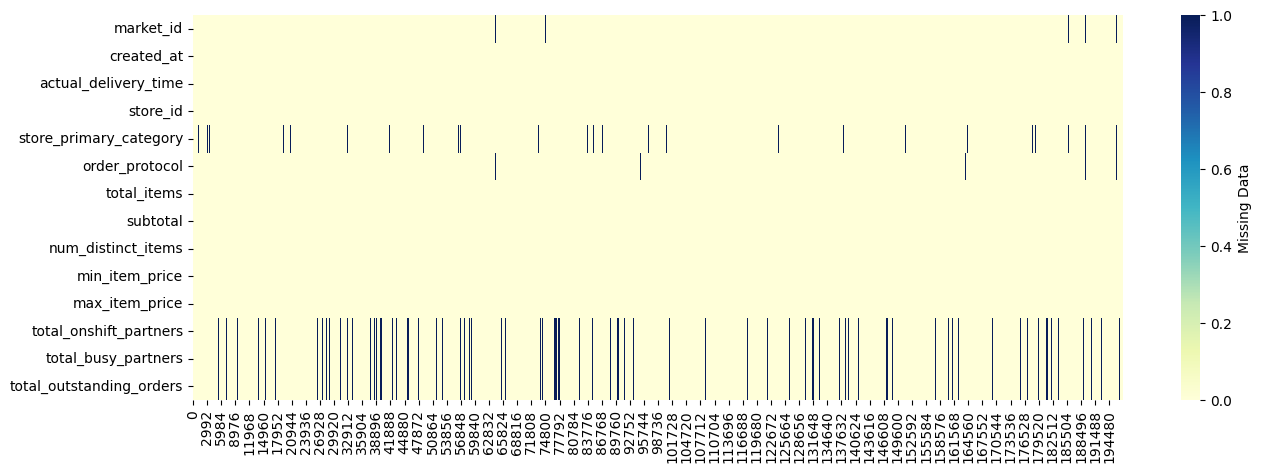

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})

In [13]:
# Missing Values
null_values= pd.DataFrame({"Null Values" : df.isna().sum(),
                           "Percentage Null Value": (df.isna().sum()/(df.shape[0])*(100))})
null_values

Null Values  Percentage Null Value
market_id                         987               0.499929
created_at                          0               0.000000
actual_delivery_time                7               0.003546
store_id                            0               0.000000
store_primary_category           4760               2.411006
order_protocol                    995               0.503981
total_items                         0               0.000000
subtotal                            0               0.000000
num_distinct_items                  0               0.000000
min_item_price                      0               0.000000
max_item_price                      0               0.000000
total_onshift_partners          16262               8.236927
total_busy_partners             16262               8.236927
total_outstanding_orders        16262               8.236927

In [14]:
df.market_id.unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.])

In [15]:
df.market_id.value_counts()

2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: market_id, dtype: int64

In [16]:

mode_value = df['market_id'].mode()[0]
print(mode_value)

# Impute missing values with the mode
df['market_id'].fillna(mode_value, inplace=True)

2.0


In [17]:
df.order_protocol.unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [18]:
df.order_protocol.value_counts()

1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
6.0      794
7.0       19
Name: order_protocol, dtype: int64

In [19]:

mode_value = df['order_protocol'].mode()[0]
print(mode_value)

# Impute missing values with the mode
df['order_protocol'].fillna(mode_value, inplace=True)

1.0


In [20]:
df.total_onshift_partners.unique()

array([ 33.,   1.,   6.,   2.,  10.,   7.,   8.,   3.,  16.,   5.,   4.,
        24.,  12.,  19.,  21.,  22.,  27.,  13.,  18., 117., 130., 121.,
        94.,  34.,  17.,  38.,  20.,  15.,  39.,  26.,  30.,  35.,  11.,
        14.,  32.,  29.,  25.,  23.,  61.,  41.,  58.,  51.,  57.,  60.,
         9., 108.,  72.,  89., 112.,  55., 126.,  80.,  69., 125., 113.,
       105.,  98.,  86.,  90.,  87.,  74.,  84.,  91.,  96., 123., 101.,
       119.,  nan, 129.,  66.,  81.,  36.,  75.,  43.,  70.,  65.,  77.,
       114.,  62., 116., 102.,  76.,  67.,  64.,  88.,  73.,  63.,  46.,
        28.,  47., 110.,  97.,  42.,  79.,  49.,  50.,  37.,  92., 103.,
        44.,  68.,  56.,   0., 107.,  78.,  71., 128., 104.,  45.,  31.,
       100.,  40.,  53., 115., 109.,  99.,  85.,  59., 118.,  54.,  52.,
        48., 132., 127., 133., 131., 149.,  93., 111.,  95.,  82., 136.,
       120., 134., 124., 106., 137.,  83., 152., 147., 144., 150., 145.,
       122., 155., 135., 151., 140., 141., 143., 13

In [21]:
df.total_onshift_partners.value_counts()

 0.0      3615
 18.0     2924
 15.0     2912
 21.0     2841
 19.0     2824
          ... 
 164.0       1
 159.0       1
 169.0       1
-4.0         1
 168.0       1
Name: total_onshift_partners, Length: 172, dtype: int64

In [22]:
median_value = df['total_onshift_partners'].median()

df['total_onshift_partners'].fillna(median_value, inplace=True)

In [23]:
median_value = df['total_busy_partners'].median()

df['total_busy_partners'].fillna(median_value, inplace=True)

In [24]:
median_value = df['total_outstanding_orders'].median()

df['total_outstanding_orders'].fillna(median_value, inplace=True)

In [25]:

df['actual_delivery_time'] = df['actual_delivery_time'].fillna(method='ffill')

In [26]:
df.store_primary_category.unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

In [27]:
df.store_primary_category.value_counts()

american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: store_primary_category, Length: 74, dtype: int64

In [28]:
df['store_primary_category'] = df['store_primary_category'].fillna("Not Specified")

In [29]:
# Missing Values
null_values= pd.DataFrame({"Null Values" : df.isna().sum(),
                           "Percentage Null Value": (df.isna().sum()/(df.shape[0])*(100))})
null_values

Null Values  Percentage Null Value
market_id                           0                    0.0
created_at                          0                    0.0
actual_delivery_time                0                    0.0
store_id                            0                    0.0
store_primary_category              0                    0.0
order_protocol                      0                    0.0
total_items                         0                    0.0
subtotal                            0                    0.0
num_distinct_items                  0                    0.0
min_item_price                      0                    0.0
max_item_price                      0                    0.0
total_onshift_partners              0                    0.0
total_busy_partners                 0                    0.0
total_outstanding_orders            0                    0.0

In [30]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25          Not Specified             1.0   
3  f0ade77b43923b38237db569b016ba25          Not Specified             1.0   
4  f0ade77b43923b38237db569b016ba25          Not Specified             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

## Data Pre-Proceesing & Feature Engineering



In [31]:
df["created_at"] = pd.to_datetime(df["created_at"])
df['created_date'] = df['created_at'].dt.date

df['created_year'] = df['created_at'].dt.year
df['created_month'] = df['created_at'].dt.month
df['created_hour'] = df['created_at'].dt.hour

In [32]:
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df['actual_delivery_date'] = df['actual_delivery_time'].dt.date
df['actual_deli_hour'] = df['actual_delivery_time'].dt.hour
df['actual_deli_year'] = df['actual_delivery_time'].dt.year
df['actual_deli_month'] = df['actual_delivery_time'].dt.month

In [33]:
df['delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [34]:

df['created_day_of_week'] = df['created_at'].dt.day_name()

In [35]:
df['actual_delivery_day_of_week'] = df['actual_delivery_time'].dt.day_name()

In [36]:
# Convert the datatype of few columns to category type
df['market_id'] = df['market_id'].astype('object')
df['store_id'] = df['store_id'].astype('object')
df['store_primary_category'] = df['store_primary_category'].astype('object')
df['order_protocol'] = df['order_protocol'].astype('object')

In [37]:
# Convert the datatype of few columns to category type
df['total_items'] = df['total_items'].astype('int64')
df['subtotal'] = df['subtotal'].astype('int64')
df['num_distinct_items'] = df['num_distinct_items'].astype('int64')
df['min_item_price'] = df['min_item_price'].astype('int64')
df['max_item_price'] = df['max_item_price'].astype('int64')

In [38]:
df = df.drop(['store_id'], axis=1)

In [39]:
def Univariate_analysis_plot(data, var):
  title = str(" Distribution of " + var + " ")
  title = title.center(150, '*')
  print('\n', title)
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
  sns.histplot(data,x=var, ax=axes[0], kde=True)
  sns.boxplot(data, x=var, ax=axes[1])
  plt.tight_layout()
  plt.show()



In [40]:
num_columns = df.select_dtypes('number')
for col in num_columns:
  print(col)

total_items
subtotal
num_distinct_items
min_item_price
max_item_price
total_onshift_partners
total_busy_partners
total_outstanding_orders
created_year
created_month
created_hour
actual_deli_hour
actual_deli_year
actual_deli_month
delivery_time


In [41]:
def percentage_outliers(df, column_name):
    data = df[column_name]
    
    # calculate the upper and lower bounds for outliers
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # identify outliers
    outliers = df[(data < lower_bound) | (data > upper_bound)]
    
    # calculate the percentage of outliers
    percentage = (len(outliers) / len(df)) * 100
    outlier_count=len(outliers)
    
    return percentage, outlier_count

In [42]:
df.dtypes

market_id                              object
created_at                     datetime64[ns]
actual_delivery_time           datetime64[ns]
store_primary_category                 object
order_protocol                         object
total_items                             int64
subtotal                                int64
num_distinct_items                      int64
min_item_price                          int64
max_item_price                          int64
total_onshift_partners                float64
total_busy_partners                   float64
total_outstanding_orders              float64
created_date                           object
created_year                            int64
created_month                           int64
created_hour                            int64
actual_delivery_date                   object
actual_deli_hour                        int64
actual_deli_year                        int64
actual_deli_month                       int64
delivery_time                     

In [43]:
cols=num_columns.columns

In [44]:
num_features = cols[:8]
num_features
def outlier_summary(num_features):
  out_per=pd.DataFrame({'Column': [],	'percentage': [], 'count':[]})
  for cols in num_features:
    #print(cols)
    #print(cols.type)
    per, out_count=percentage_outliers(df, cols)
    #print(per)
    new_row={'Column':cols, 'percentage':per,'count':out_count}
    out_per = out_per.append(new_row, ignore_index=True)
  return out_per
   
out_sum=outlier_summary(num_features)
out_sum

Column  percentage   count
0               total_items    4.856454  9588.0
1                  subtotal    4.585976  9054.0
2        num_distinct_items    2.998055  5919.0
3            min_item_price    2.329963  4600.0
4            max_item_price    3.914845  7729.0
5    total_onshift_partners    2.360861  4661.0
6       total_busy_partners    1.457747  2878.0
7  total_outstanding_orders    4.308913  8507.0

In [45]:
def outlierAnalysis(x):
  Q3, Q1 = np.percentile(df[x], [75 ,25])
  IQR = Q3 - Q1
  maxExcludingOutlier = Q3 + 1.5 * IQR
  minExcludingOutlier = Q1 - 1.5 * IQR
  mean = round(df[x].mean(),2)
  median = round(df[x].median(),2)
  mode = round(df[x].mode(), 2)
  print("----------------------------------------------------------")
  print("For the given sample " + x +"Analysis is as Follows: ")
  print("Q1: ", Q1)
  print("Q3: ", Q3)
  print("Mean: ", round(df[x].mean(),2))
  print("Median: ", df[x].median())
  print("Mode: " , round(df[x].mode(), 2))
  print("IQR: " , IQR)
  print("Maximum " + x +" Excluding Outlier: " , maxExcludingOutlier) 
  print("Minimum " + x + " Purchase Excluding Outlier: " , minExcludingOutlier)

In [46]:
for i in num_features:
  outlierAnalysis(i)

----------------------------------------------------------
For the given sample total_itemsAnalysis is as Follows: 
Q1:  2.0
Q3:  4.0
Mean:  3.2
Median:  3.0
Mode:  0    2
Name: total_items, dtype: int64
IQR:  2.0
Maximum total_items Excluding Outlier:  7.0
Minimum total_items Purchase Excluding Outlier:  -1.0
----------------------------------------------------------
For the given sample subtotalAnalysis is as Follows: 
Q1:  1400.0
Q3:  3395.0
Mean:  2682.33
Median:  2200.0
Mode:  0    1500
Name: subtotal, dtype: int64
IQR:  1995.0
Maximum subtotal Excluding Outlier:  6387.5
Minimum subtotal Purchase Excluding Outlier:  -1592.5
----------------------------------------------------------
For the given sample num_distinct_itemsAnalysis is as Follows: 
Q1:  1.0
Q3:  3.0
Mean:  2.67
Median:  2.0
Mode:  0    2
Name: num_distinct_items, dtype: int64
IQR:  2.0
Maximum num_distinct_items Excluding Outlier:  6.0
Minimum num_distinct_items Purchase Excluding Outlier:  -2.0
----------------------

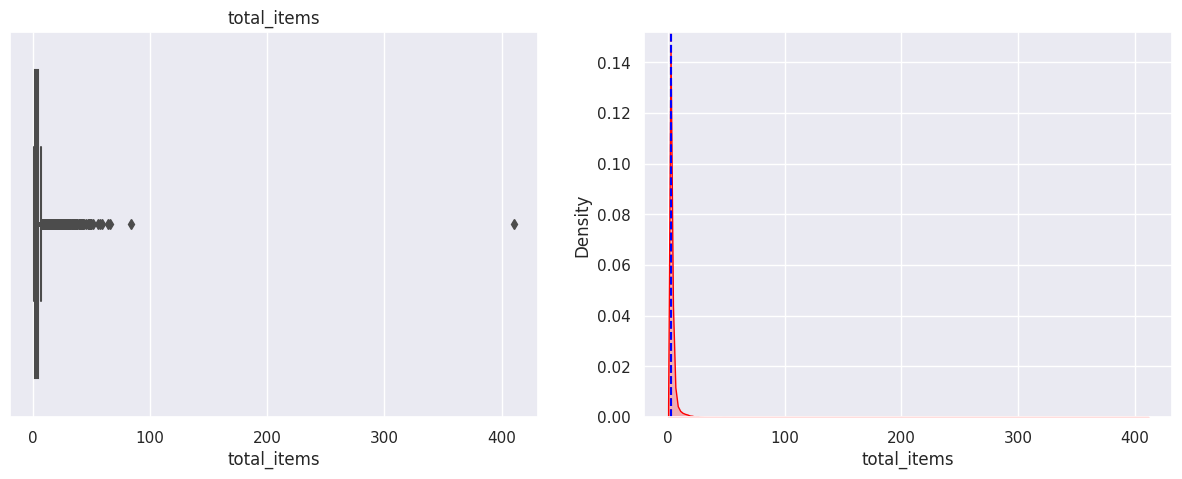

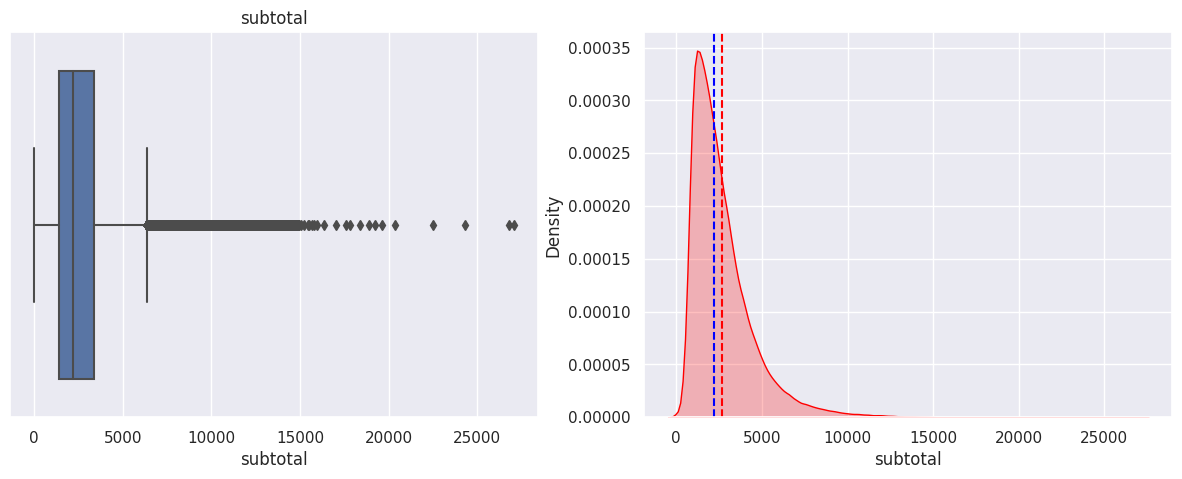

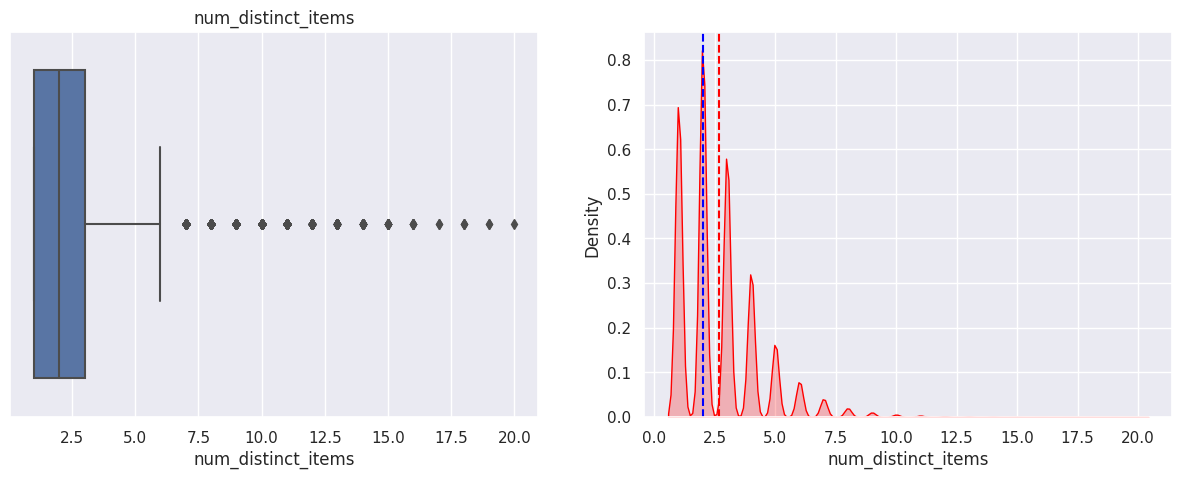

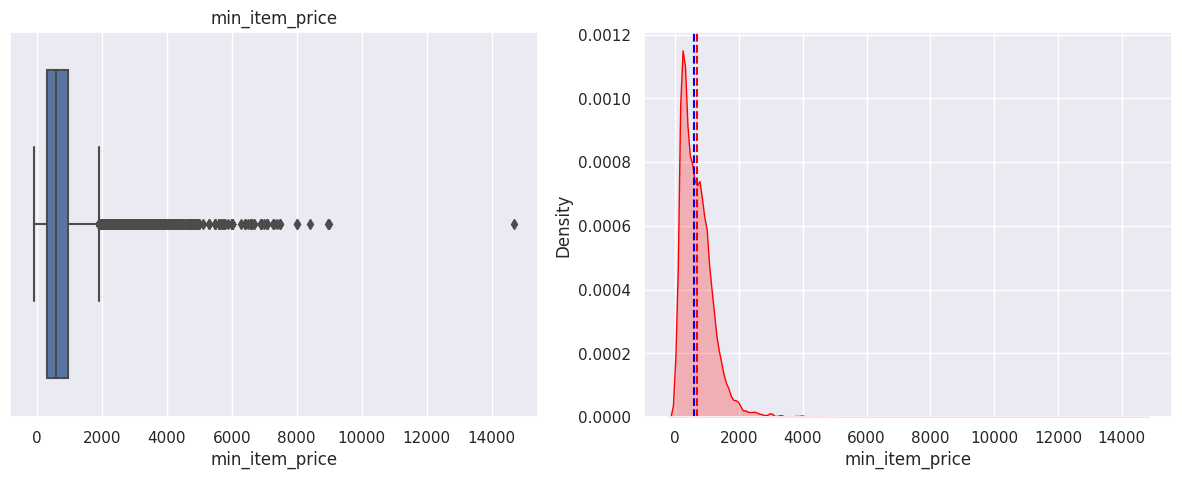

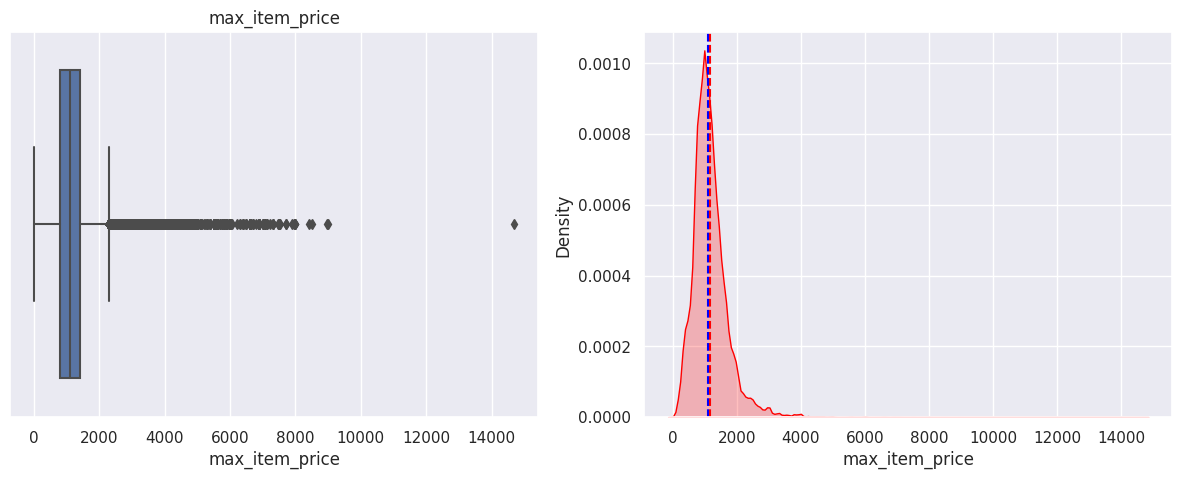

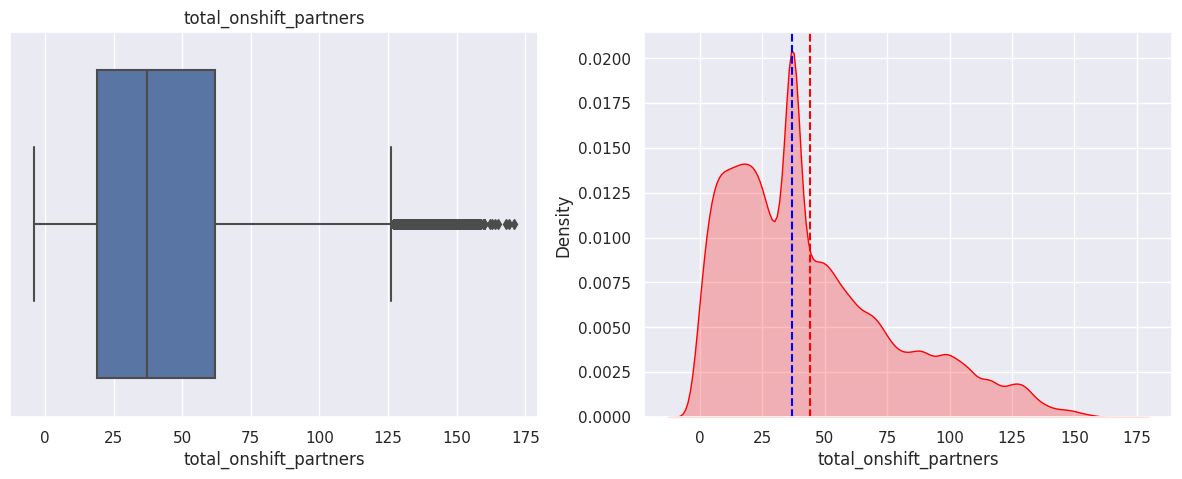

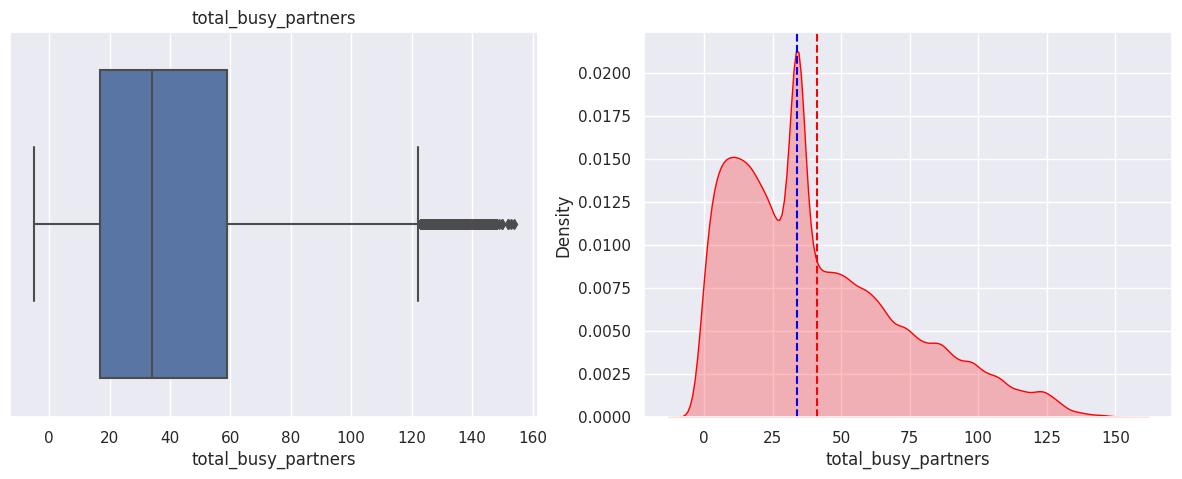

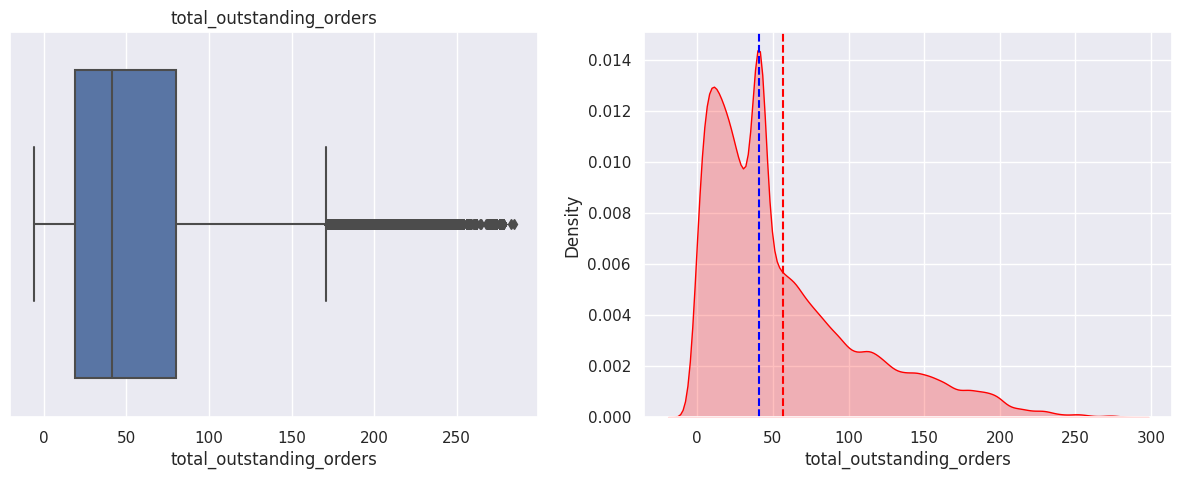

In [47]:
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (20, 6)

for col in num_features:
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  p = sns.boxplot(data=df,x=col)
  p.set(title=f'{col}')
  
  plt.subplot(122)
  sns.kdeplot(x=df[col],color='red',shade=True)
  #sns.distplot(x=work_df[col],hist=True, kde=True)
  plt.axvline(x=df[col].mean(),color='red',ls='--',lw=1.5)
  
  plt.axvline(x=df[col].median(),color='blue',ls='--',lw=1.5)
  
  plt.show()

In [48]:
for i, j in enumerate(num_features):
  q1 = df[j].quantile(0.25)
  q3 = df[j].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  df = df[(df[j] >= lower_bound) & (df[j] <= upper_bound)]   

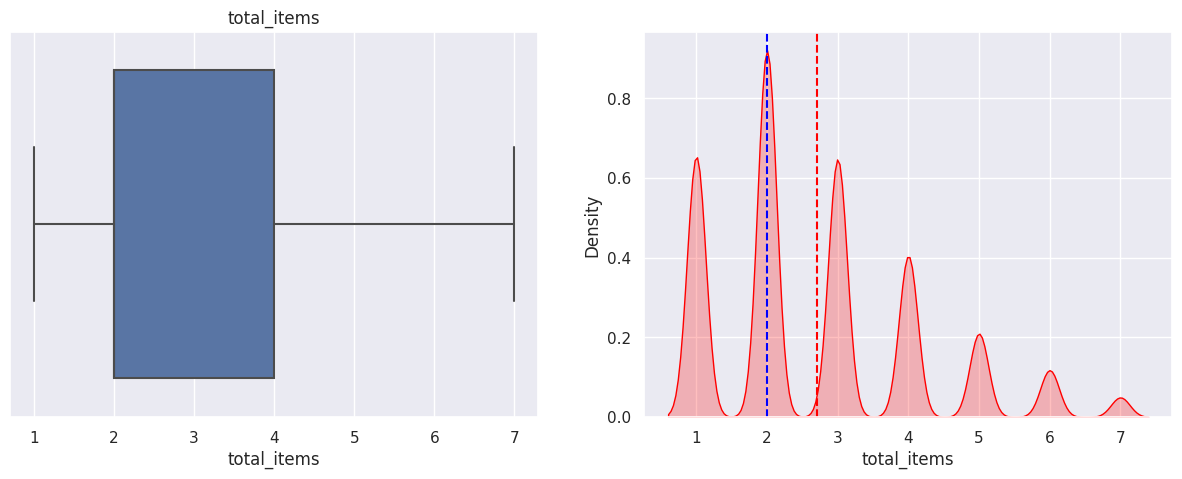

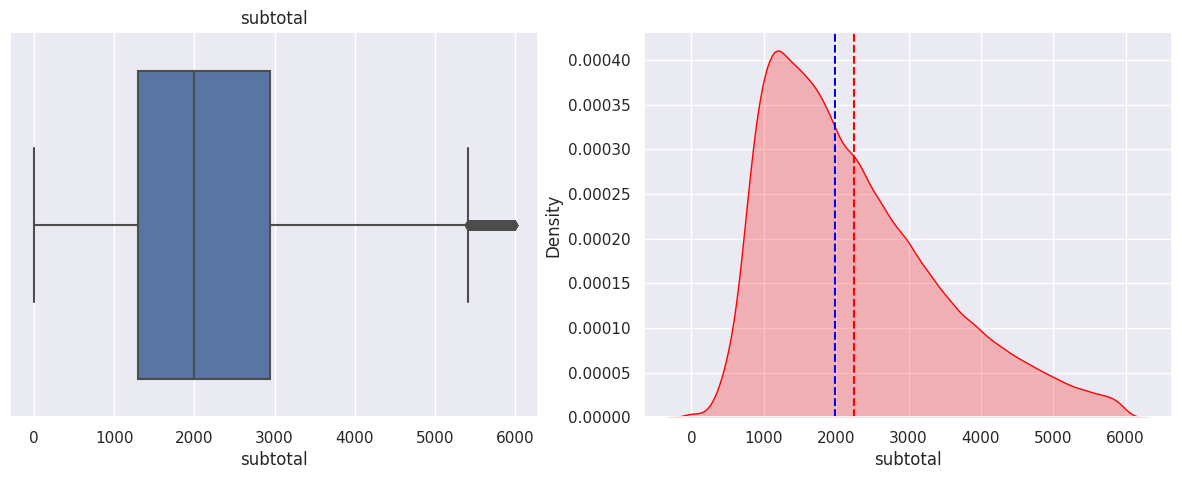

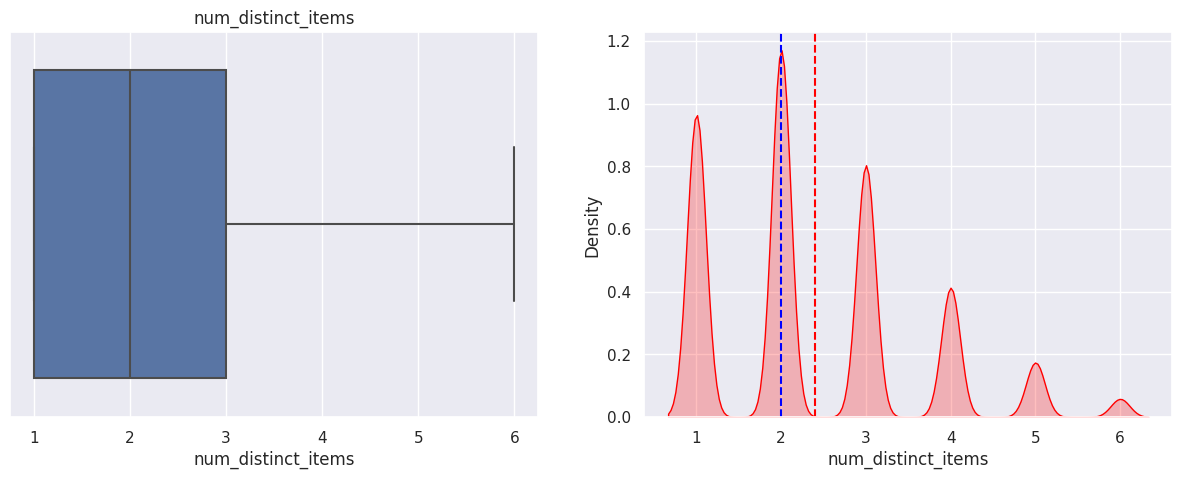

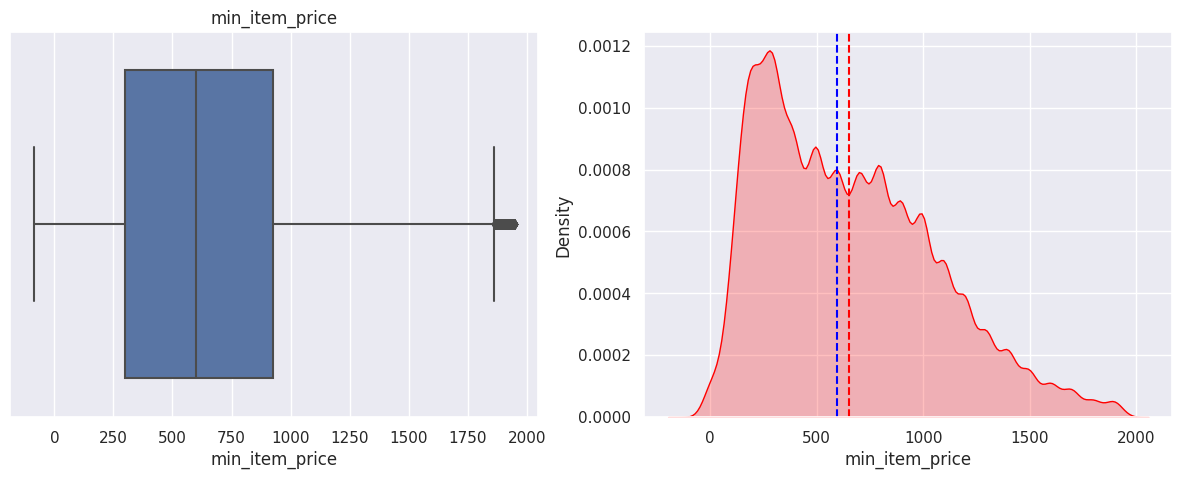

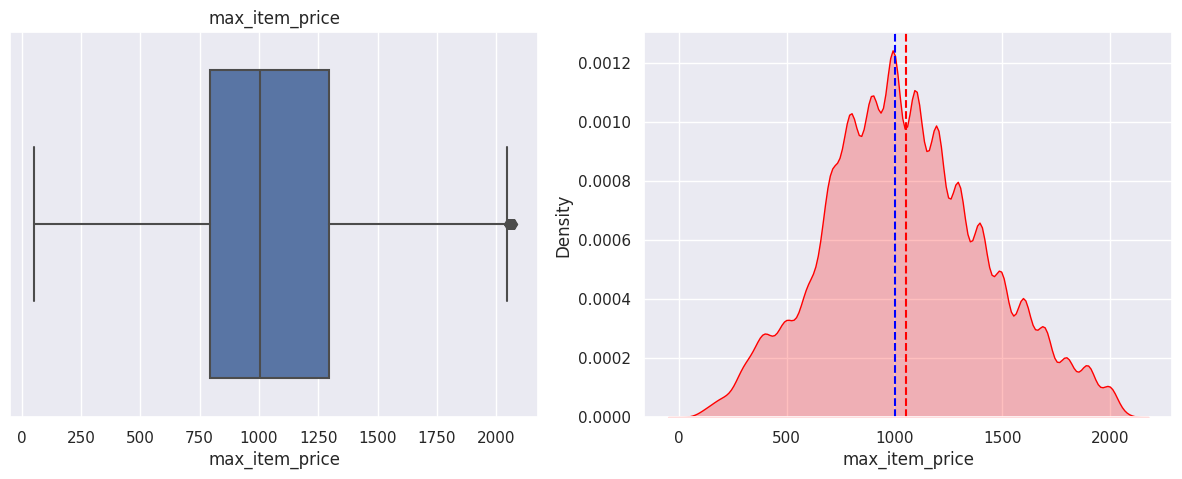

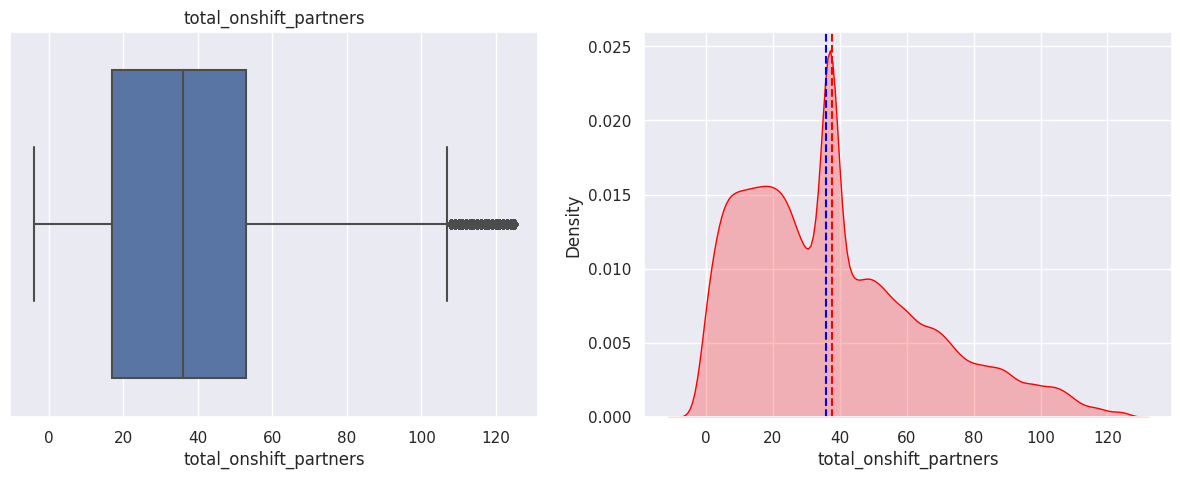

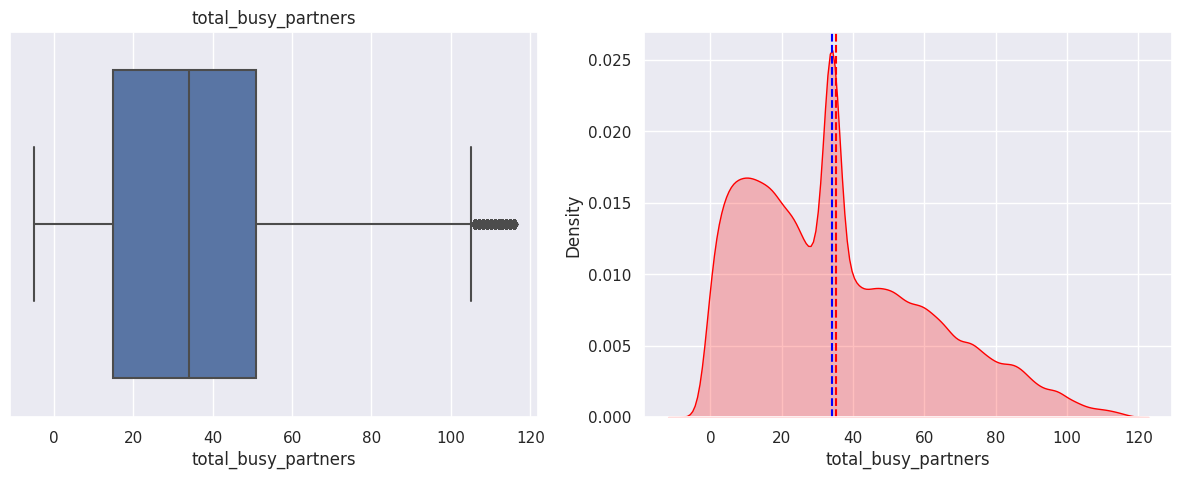

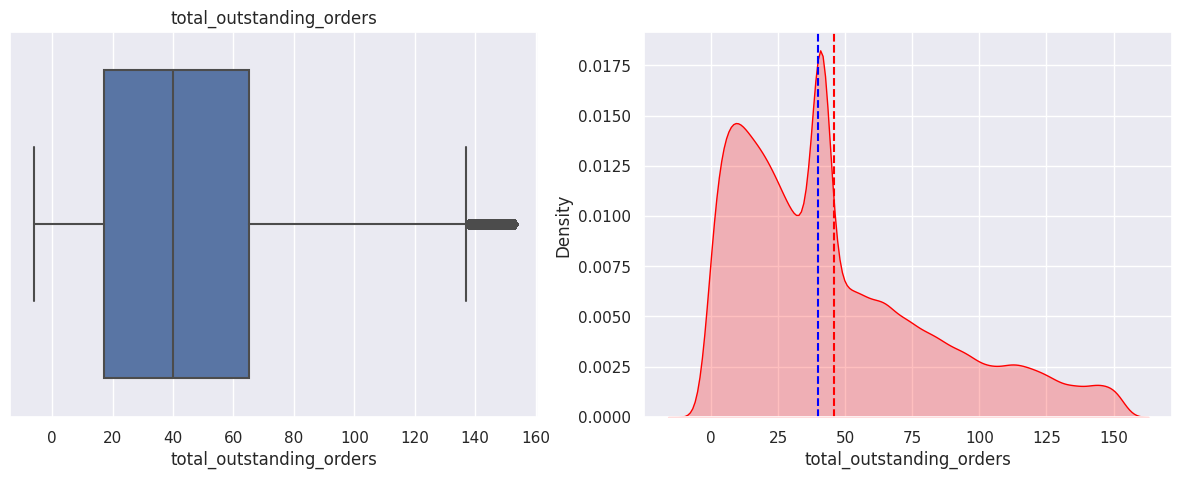

In [49]:
sns.set_theme(style='darkgrid')
# Create a cross-tabulation
for col in num_features:
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  p = sns.boxplot(data=df,x=col)
  p.set(title=f'{col}')
  
  plt.subplot(122)
  sns.kdeplot(x=df[col],color='red',shade=True)
  #sns.distplot(x=work_df[col],hist=True, kde=True)
  plt.axvline(x=df[col].mean(),color='red',ls='--',lw=1.5)
  
  plt.axvline(x=df[col].median(),color='blue',ls='--',lw=1.5)
  
  plt.show()

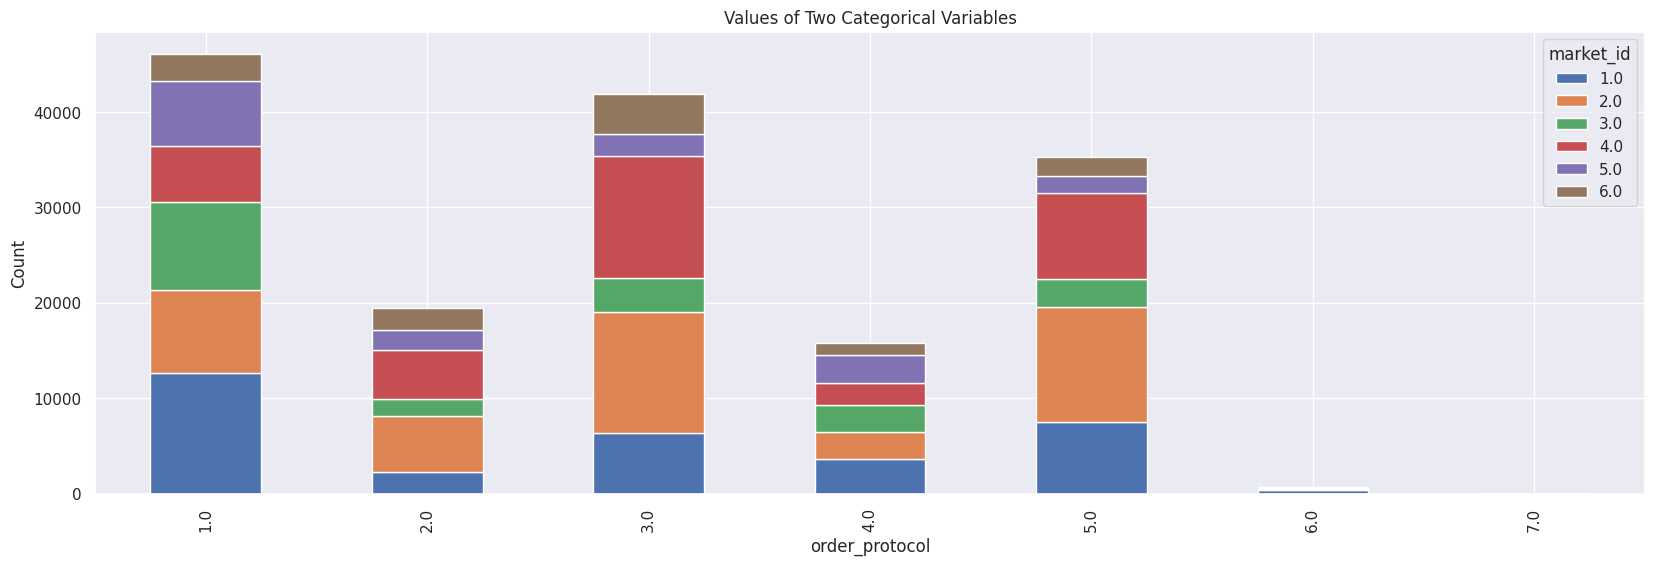

In [50]:
# Create a cross-tabulation
plt.rcParams['figure.figsize'] = (20, 6)
cross_tab = pd.crosstab(df['order_protocol'], df['market_id'])

# Create a stacked bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('order_protocol')
plt.ylabel('Count')
plt.title('Values of Two Categorical Variables')

# Display the plot
plt.show()

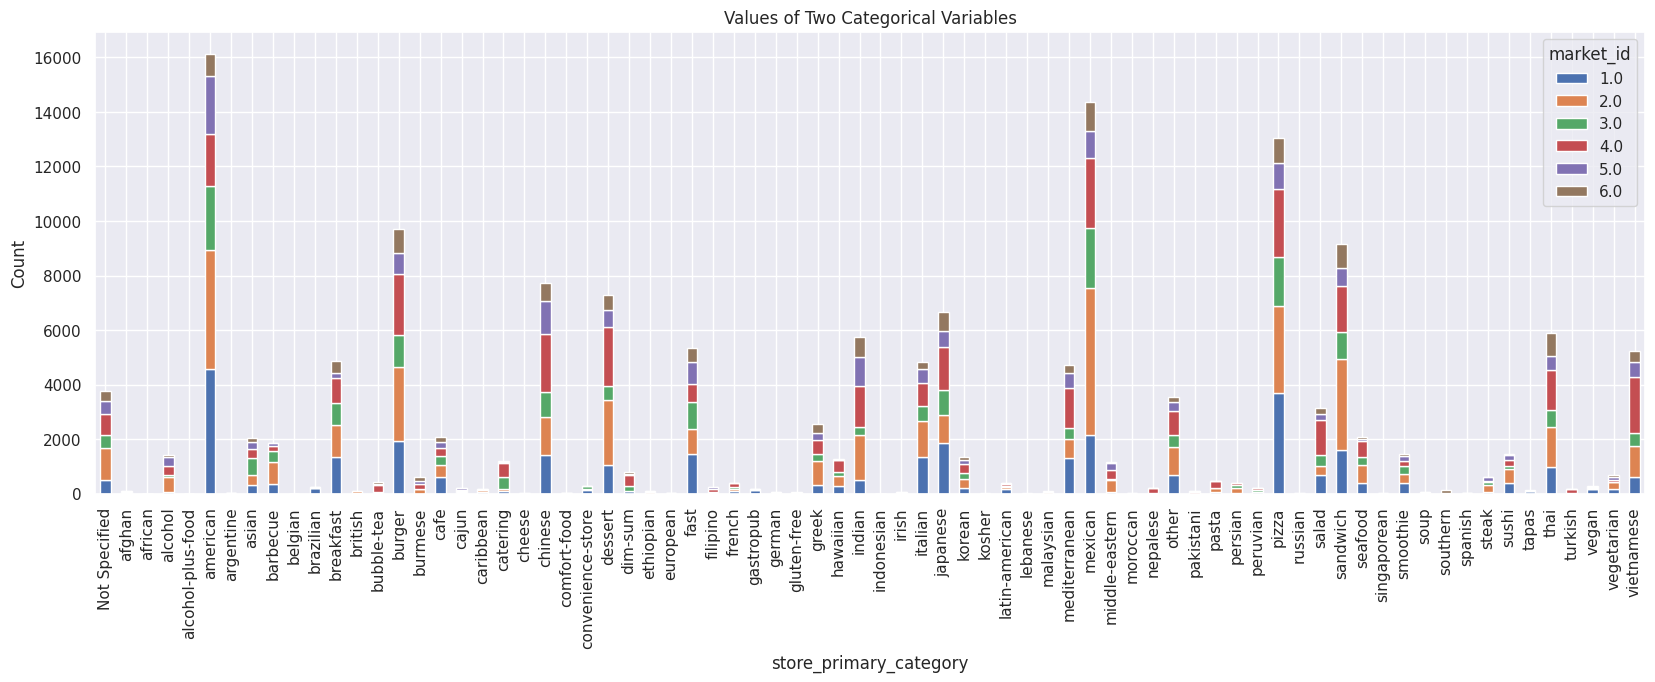

In [51]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['store_primary_category'], df['market_id'])

# Create a stacked bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('store_primary_category')
plt.ylabel('Count')
plt.title('Values of Two Categorical Variables')

# Display the plot
plt.show()

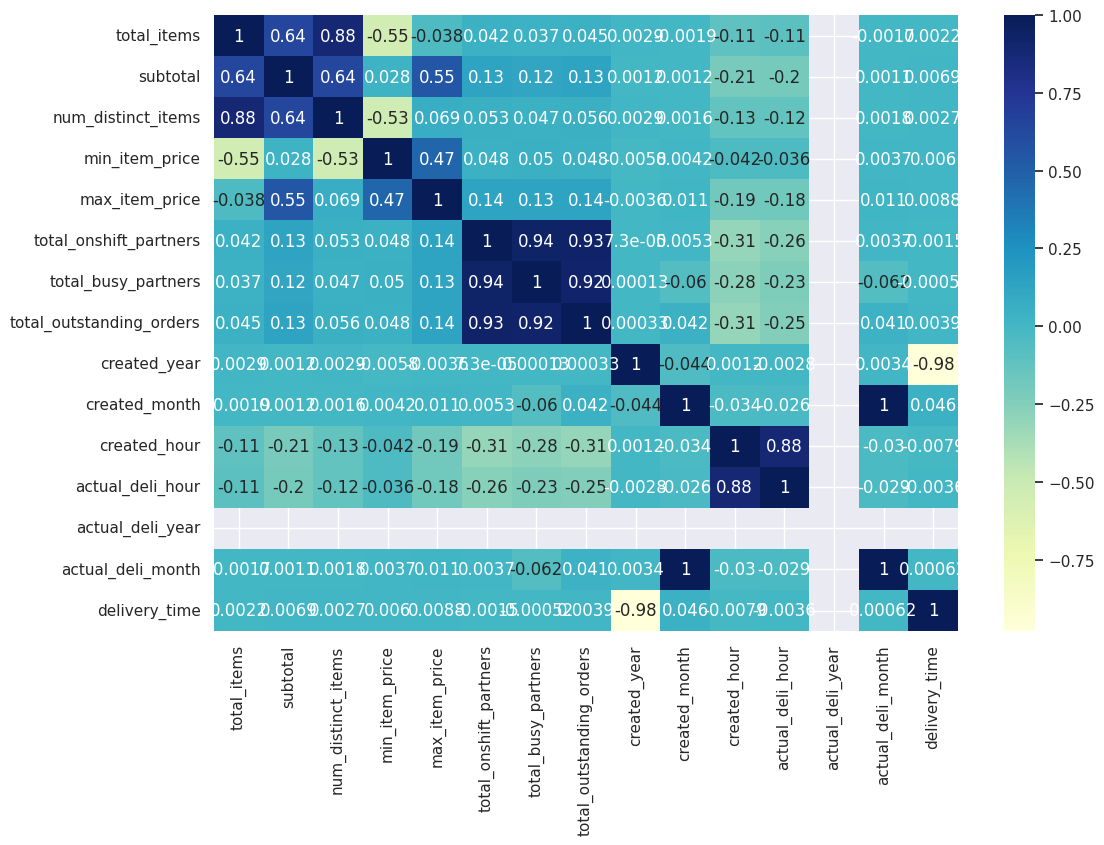

In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()
     

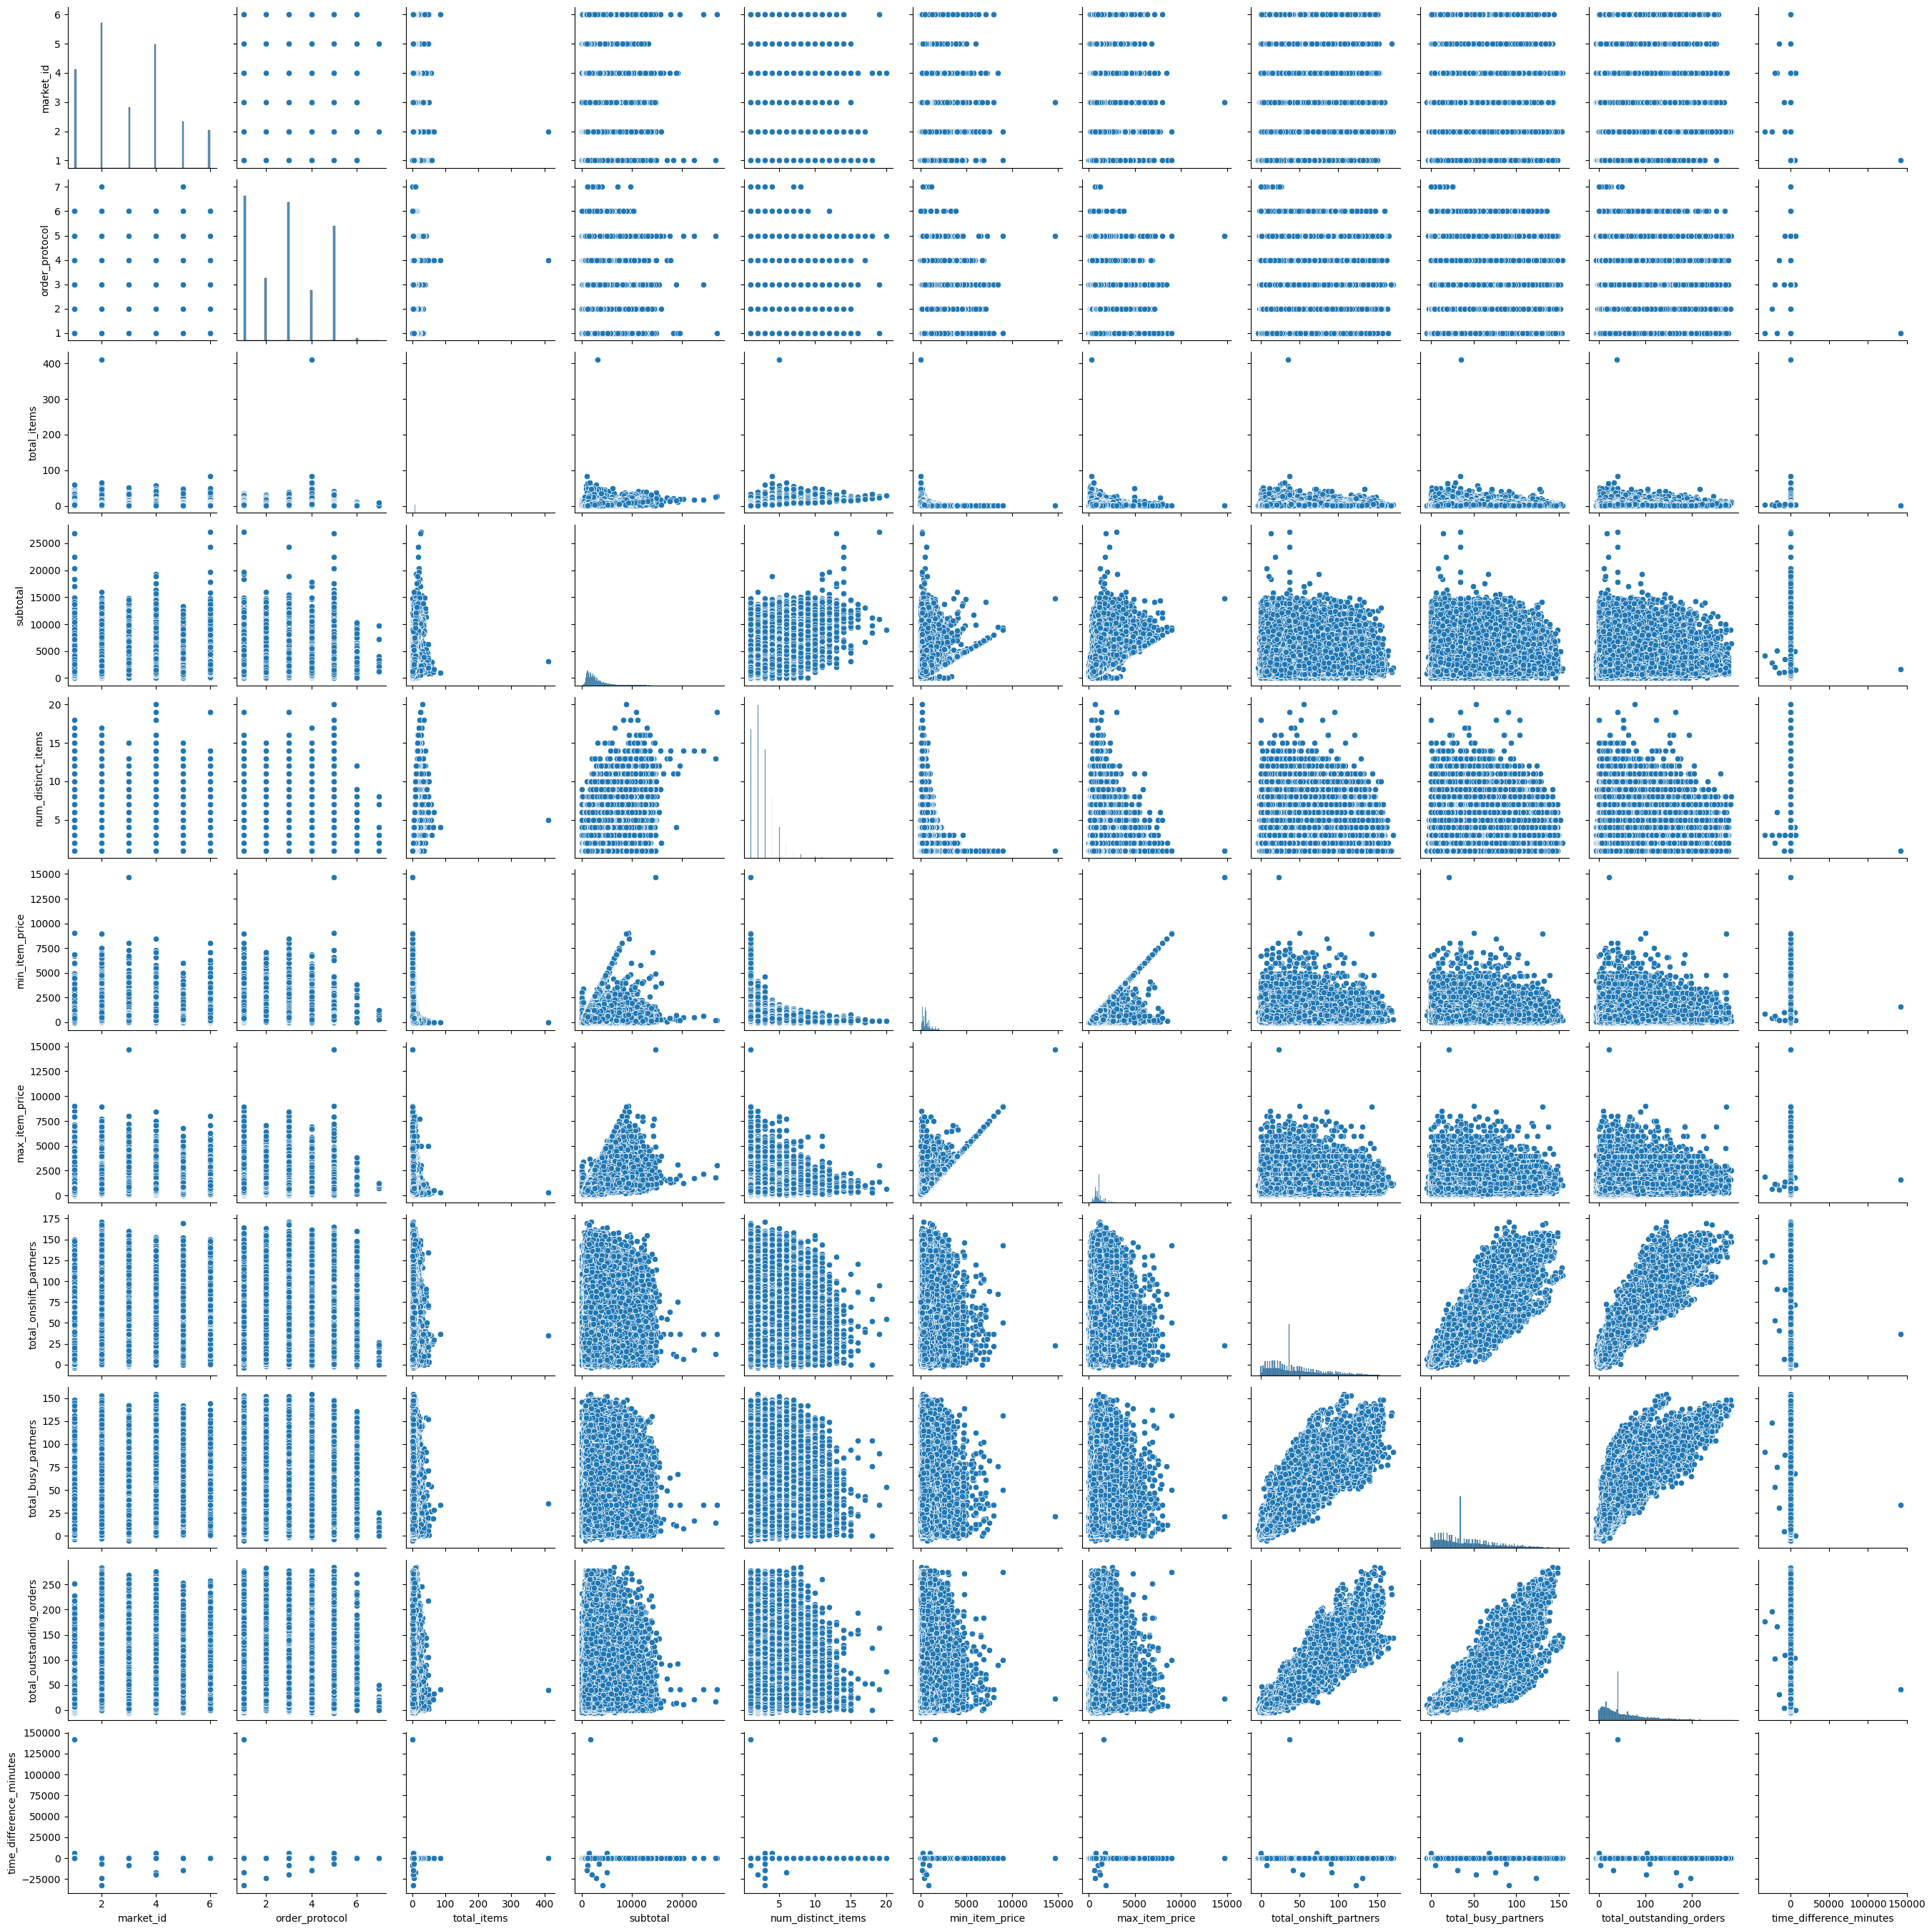

In [41]:
sns.pairplot(df)

<Axes: xlabel='total_busy_partners', ylabel='total_outstanding_orders'>

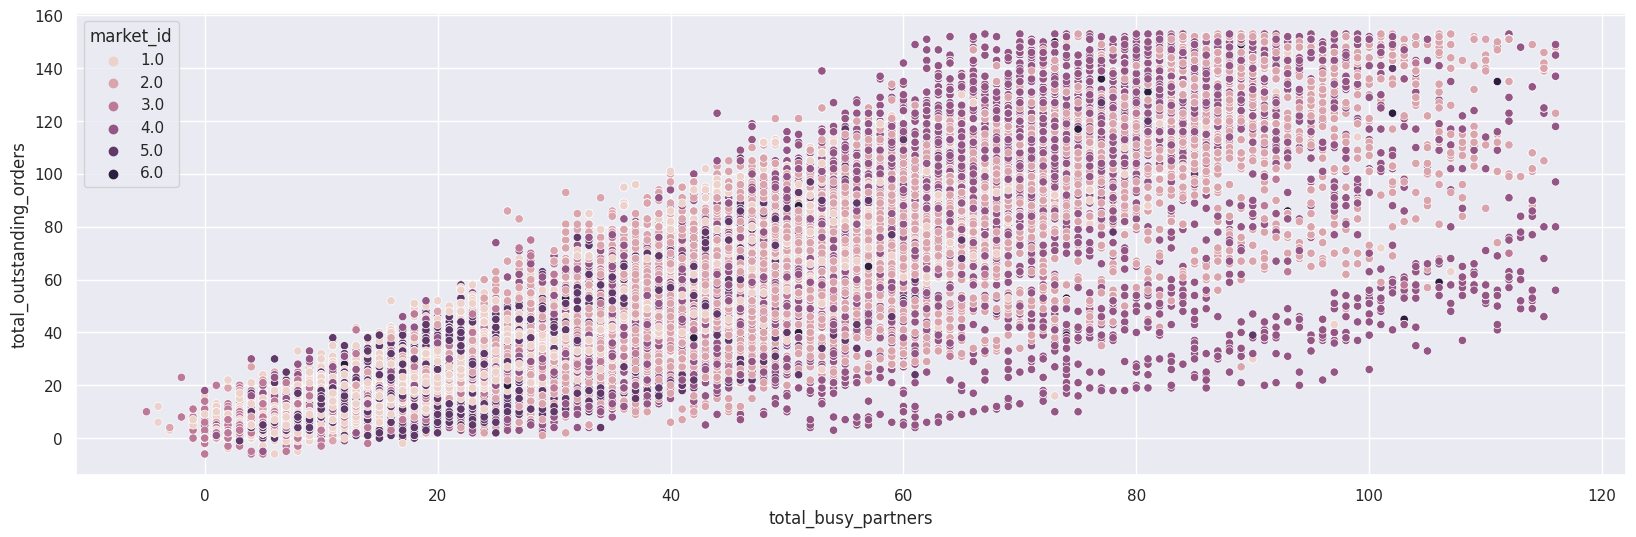

In [54]:
sns.scatterplot(x=df['total_busy_partners'],y=df['total_outstanding_orders'],hue=df['market_id'])

<Axes: xlabel='total_onshift_partners', ylabel='total_outstanding_orders'>

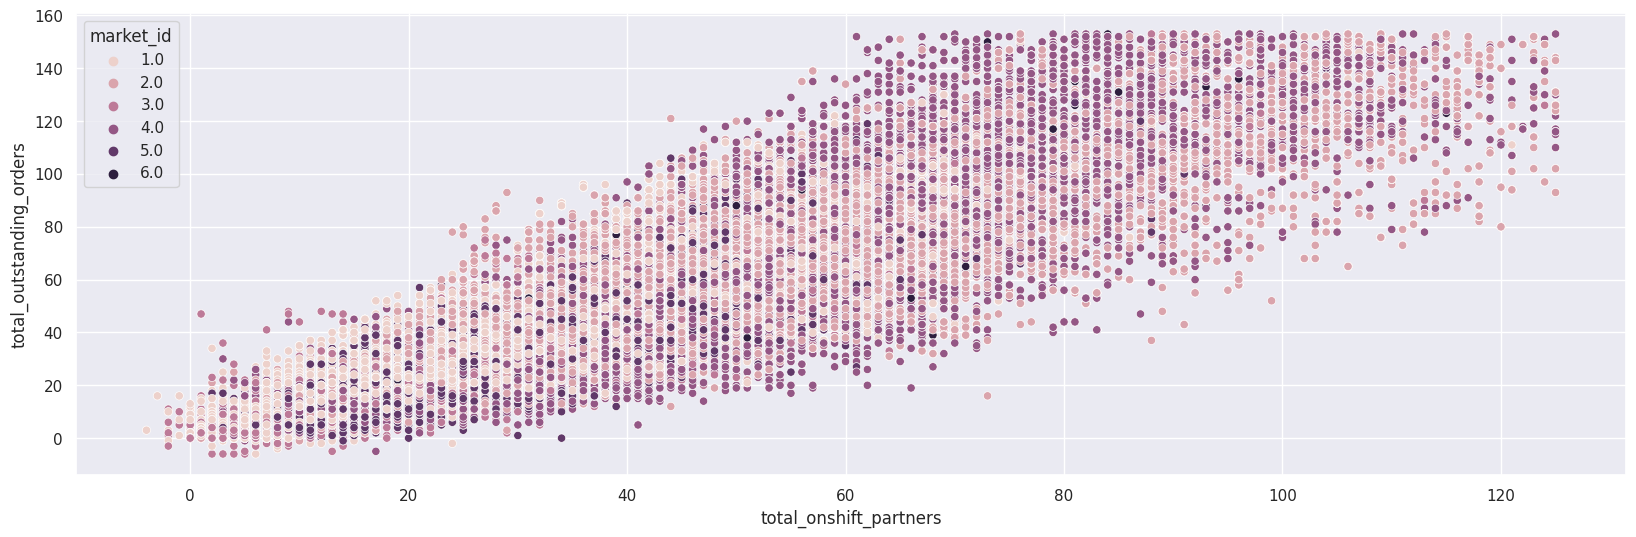

In [55]:
sns.scatterplot(x=df['total_onshift_partners'],y=df['total_outstanding_orders'],hue=df['market_id'])

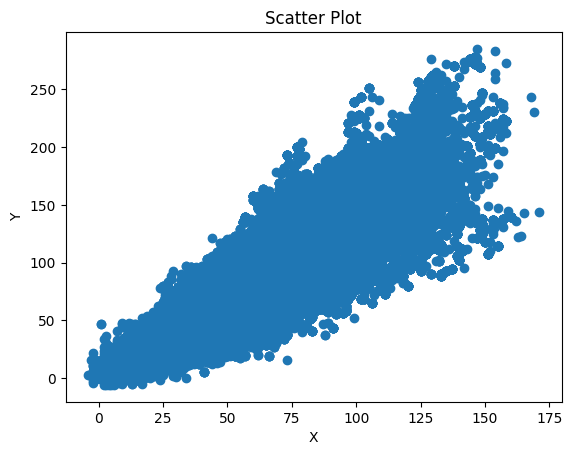

In [62]:
plt.scatter(x=df['total_onshift_partners'],y=df['total_outstanding_orders'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')

# Display the plot
plt.show()

In [55]:
df_work=df.copy()

In [53]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in ['store_primary_category','created_day_of_week','actual_delivery_day_of_week']:
    if df[column].dtype == 'object':  # Check if column contains categorical data
        df[column] = label_encoder.fit_transform(df[column])

In [54]:
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:27:16                       5   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:56:29                      47   
2       3.0 2015-01-22 20:39:28  2015-01-22 21:09:09                       0   
4       3.0 2015-02-15 02:40:36  2015-02-15 03:20:26                       0   
5       3.0 2015-01-28 20:30:38  2015-01-28 21:08:58                       0   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            1.0            1      1900                   1            1900   
4            1.0            3      3900                   3            1100   
5            1.0            3      5000                   3            1500   

   max_item_price  ...  created_year  created_month  created_hour  \
0            1239  ...          2015              2            22   
1            1400  ...          2015              2            21   
2            1900  ...          2015              1            20   
4            1600  ...          2015              2             2   
5            1900  ...          2015              1            20   

  actual_delivery_date  actual_deli_hour  actual_deli_year  actual_deli_month  \
0           2015-02-06                23              2015                  2   
1           2015-02-10                22              2015                  2   
2           2015-01-22                21              2015                  1   
4           2015-02-15                 3              2015                  2   
5           2015-01-28                21              2015                  1   

  delivery_time  created_day_of_week  actual_delivery_day_of_week  
0     62.983333                    0                            0  
1     67.066667                    5                            5  
2     29.683333                    4                            4  
4     39.833333                    3                            3  
5     38.333333                    6                            6  

[5 rows x 24 columns]

In [65]:
X = df.drop(columns=['created_at','actual_delivery_time','delivery_time','created_date','actual_delivery_date'])

y = df['delivery_time']

In [66]:
X.dtypes

market_id                       object
store_primary_category           int64
order_protocol                  object
total_items                      int64
subtotal                         int64
num_distinct_items               int64
min_item_price                   int64
max_item_price                   int64
total_onshift_partners         float64
total_busy_partners            float64
total_outstanding_orders       float64
created_hour                     int64
actual_deli_hour                 int64
created_day_of_week              int64
actual_delivery_day_of_week      int64
dtype: object

In [67]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (128987, 15) (128987,)
Validation: (14332, 15) (14332,)
Test  :  (15925, 15) (15925,)


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [69]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [186]:
def create_baseline():

  model = Sequential([
      Dense(64, activation="linear"),
                    Dense(32, activation="linear"),
                    Dense(16, activation="linear"), 
                    Dense(8, activation="linear"),
                    Dense(4, activation="linear"), 
                    Dense(1,activation='linear')])  
  return model

In [187]:
model = create_baseline()

In [188]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.02),
                loss = tf.keras.losses.MeanSquaredError(), metrics=['Precision','Recall','accuracy']  )


In [189]:
# Train the model
history=model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10, batch_size=256 )

Epoch 1/10
504/504 [==============================] - 2s 3ms/step - loss: 162534.7812 - precision: 1.0000 - recall: 0.9937 - accuracy: 0.0000e+00 - val_loss: 2959.5249 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
504/504 [==============================] - 1s 2ms/step - loss: 162441.0469 - precision: 1.0000 - recall: 0.9998 - accuracy: 0.0000e+00 - val_loss: 2954.8335 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
504/504 [==============================] - 1s 2ms/step - loss: 162436.3438 - precision: 1.0000 - recall: 0.9998 - accuracy: 0.0000e+00 - val_loss: 3030.9973 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
504/504 [==============================] - 1s 3ms/step - loss: 162438.7188 - precision: 1.0000 - recall: 0.9997 - accuracy: 0.0000e+00 - val_loss: 2951.9353 - val_precision: 1.0000 - val_recall: 1.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
504/504 [====================

In [190]:
# Predict using the trained model
predictions = model.predict(X_test)

498/498 [==============================] - 1s 1ms/step


In [191]:
# Create a dataframe with predicted and actual values
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
df

Actual  Predicted
152801  41.650000  44.681892
60578   45.700000  53.924187
161689  42.483333  62.980309
24780   33.450000  56.286659
160422  15.583333  43.824989
...           ...        ...
142931  63.883333  59.545502
84196   32.150000  45.961578
181644  84.233333  51.126801
112686  50.333333  52.335396
6875    42.250000  47.963135

[15925 rows x 2 columns]

Text(0.5, 0, 'Prediction Level')

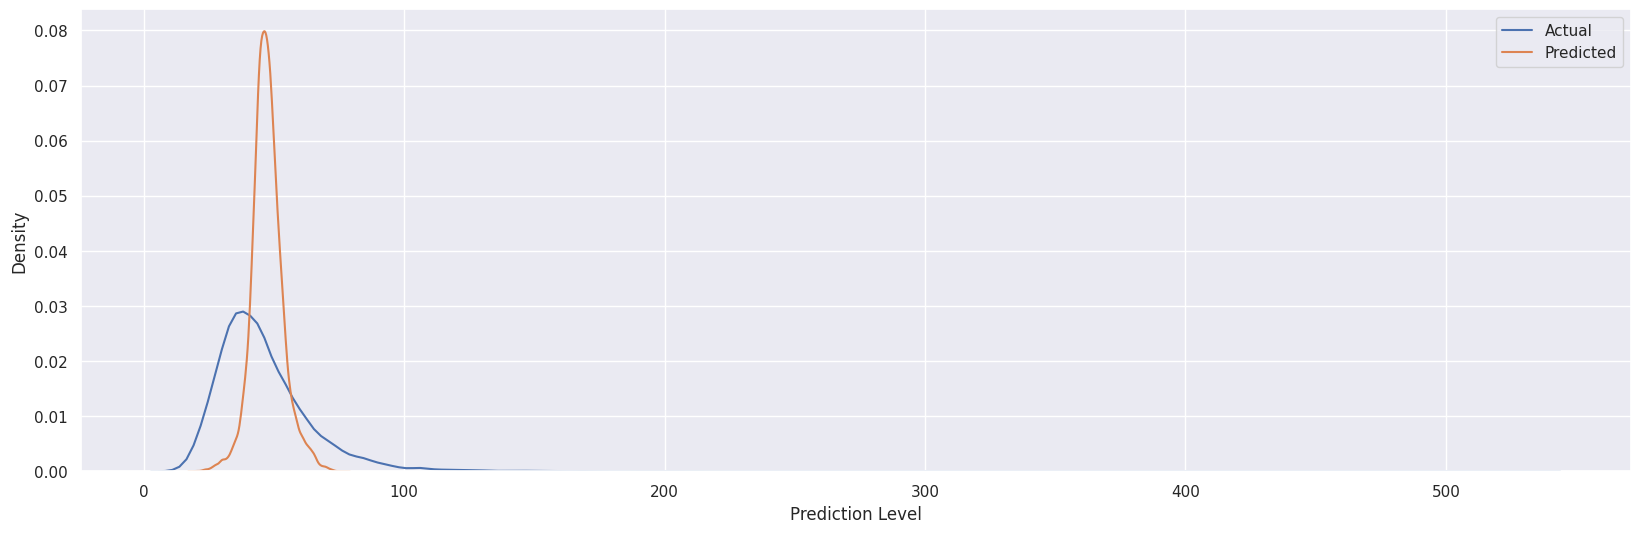

In [193]:
sns.distplot(df['Actual'], hist=False, label='Actual')
sns.distplot(df['Predicted'], hist=False, label='Predicted')
plt.legend(loc='upper right')
plt.xlabel('Prediction Level')

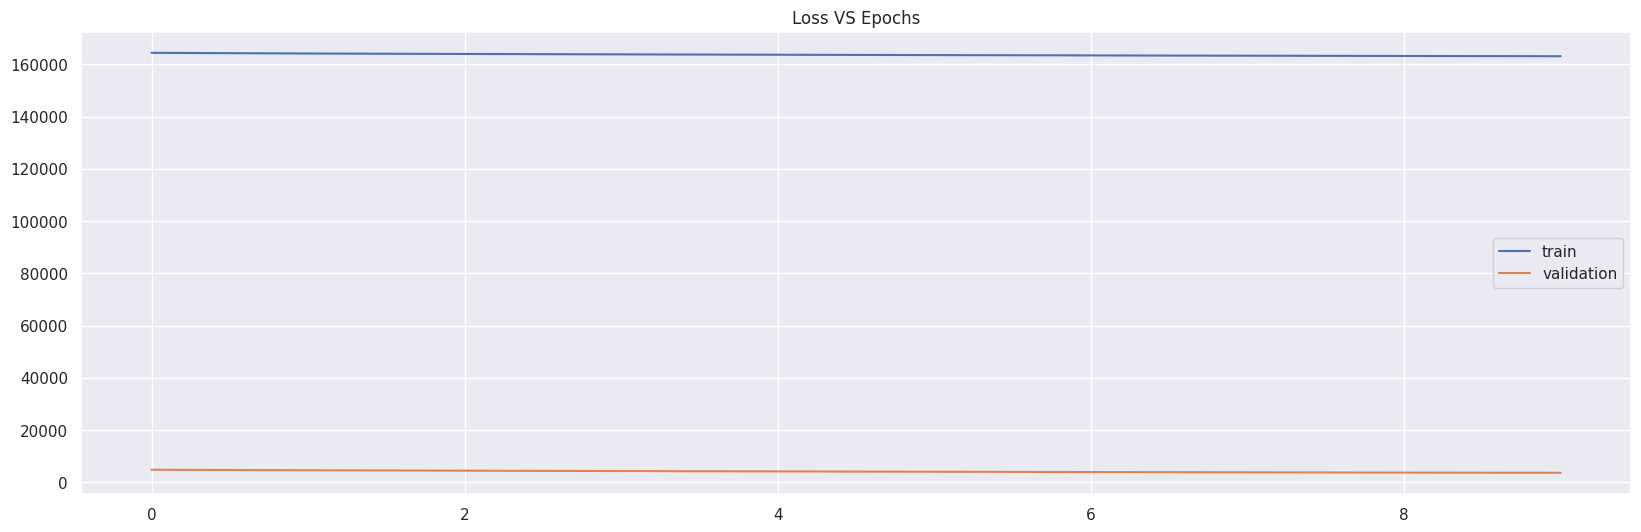

In [144]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()